In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
my_colors = ['#668B8B', '#CDAF95', '#CDB5CD', '#CAE1FF']
sns.set_style("whitegrid")
sns.set_palette(my_colors )

In [33]:
df = pd.read_pickle('../data/unified_dataframe/data_unprocessed.pkl')
df.head()

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,NaN,NaN
1,621e328667b776a240281372,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Maintenance,intrinsic_regulation,NaN,HIGH,AVERAGE,HIGH,LOW,LOW,NaN,NaN
2,621e326767b776a24012e179,2021-05-24,NaN,46.120,53.968,95.3,14.4,80.0,0.666667,0.925,...,Maintenance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e332267b776a24092a584,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Maintenance,identified_regulation,NaN,LOW,LOW,LOW,AVERAGE,HIGH,NaN,NaN
4,621e333567b776a240a0c217,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Contemplation,intrinsic_regulation,NaN,AVERAGE,HIGH,AVERAGE,LOW,LOW,NaN,NaN


In [34]:
demo = df[['id', 'age', 'gender', 'bmi']]
demo = demo.drop_duplicates()
demo.head()

,id,age,gender,bmi
0,621e2e8e67b776a24055b564,<30,MALE,<19
1,621e328667b776a240281372,>=30,MALE,>=30
2,621e326767b776a24012e179,<30,FEMALE,<19
3,621e332267b776a24092a584,<30,MALE,21.0
4,621e333567b776a240a0c217,<30,MALE,21.0


In [35]:
demo['age'].value_counts()

<30     37
>=30    31
Name: age, dtype: int64

In [36]:
demo['gender'].value_counts()

MALE      42
FEMALE    27
Name: gender, dtype: int64

In [37]:
demo['bmi'].value_counts()

24.0    9
20.0    9
<19     7
21.0    7
23.0    6
22.0    6
>=30    4
26.0    4
>=25    4
19.0    3
27.0    3
28.0    2
29.0    2
25.0    2
Name: bmi, dtype: int64

In [38]:
print(sns.color_palette("Set1").as_hex())

['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


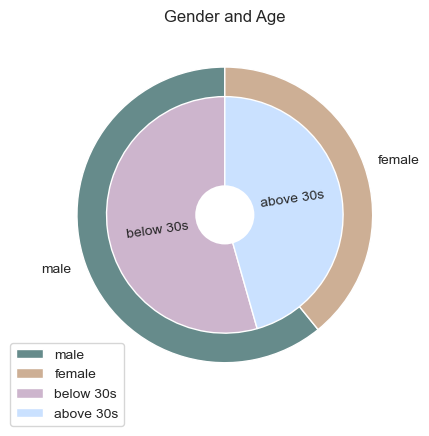

In [39]:
first_labels = ['male', 'female']
first_sizes = [42, 27]
second_labels=['below 30s', 'above 30s']
second_sizes = [37, 31]
third_labels = ['normal', 'overweight', 'underweight', 'obese']
third_sizes = [43, 17, 7, 4]
 
fl = ['#668B8B', '#CDAF95']
dd = ['#CDB5CD', '#CAE1FF']


bigger = plt.pie(first_sizes, labels=first_labels, colors=fl,
                 startangle=90, frame=True, radius = 1,
                wedgeprops={'edgecolor':'w'})

smaller = plt.pie(second_sizes, labels=second_labels,
                  colors=dd, radius=0.8,
                  startangle=90, labeldistance=0.3,
                 wedgeprops={'edgecolor':'w'}, rotatelabels=True)

centre_circle = plt.Circle((0, 0), 0.2, color='white', linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# add legend to current ax:
plt.gca().legend(loc='best', bbox_to_anchor=(-0.1,-0.09,0.5,0.5))
plt.title('Gender and Age')
plt.savefig("visualizations/demo1.png",bbox_inches='tight')
plt.savefig("visualizations/demo1.eps",bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


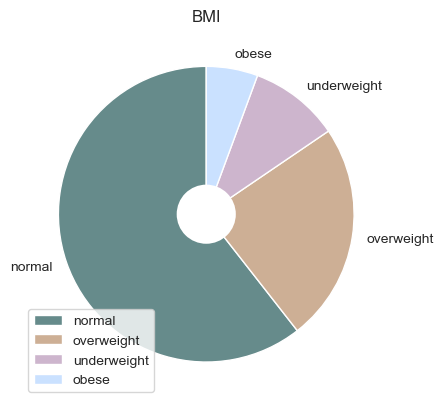

In [40]:
f = ['#668B8B', '#CDAF95', '#CDB5CD', '#CAE1FF']

smaller = plt.pie(third_sizes, labels=third_labels,
                  colors=f, radius=1,
                  startangle=90, labeldistance=1.1,
                 wedgeprops={'edgecolor':'w'})

centre_circle = plt.Circle((0, 0), 0.2, color='white', linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# add legend to current ax:
plt.gca().legend(loc='center right', bbox_to_anchor=(1,0,0.5,0.5))
plt.title('BMI')
plt.legend(third_labels,loc=3)
plt.savefig("visualizations/demo2.png",bbox_inches='tight')
plt.savefig("visualizations/demo2.eps",bbox_inches='tight')
plt.show()

In [41]:
per = pd.read_csv('../data/surveys/personality1.csv')
per.head()

,personality_type,test_score,gender
0,extraversion,21,MALE
1,extraversion,32,FEMALE
2,extraversion,40,FEMALE
3,extraversion,25,MALE
4,extraversion,41,FEMALE


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


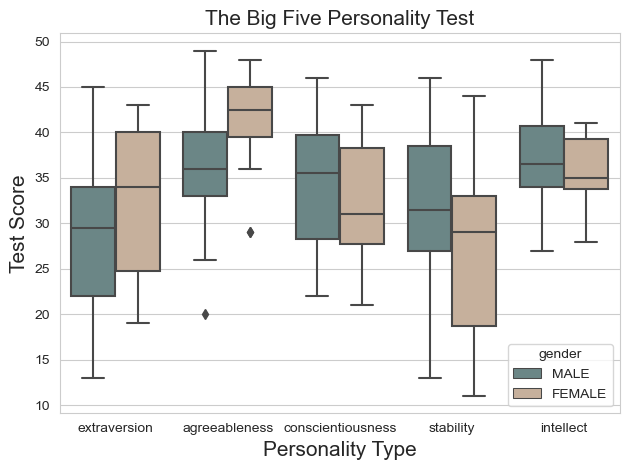

In [42]:
sns.set_style("whitegrid")
box_plot  = sns.boxplot(data=per, x='personality_type', y='test_score', hue='gender', palette=my_colors)
plt.ylabel("Test Score", size=15)
plt.xlabel("Personality Type", size=15)
plt.title("The Big Five Personality Test", size=15)
plt.tight_layout()
plt.savefig("visualizations/personality_boxplots.png")
plt.savefig("visualizations/personality_boxplots.eps")
plt.show()

In [43]:
mood = df[['label_stai_stress_category', 'label_panas_negative_affect']]
mood

,label_stai_stress_category,label_panas_negative_affect
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
7799,NaN,NaN
7800,NaN,NaN
7801,NaN,NaN
7802,NaN,NaN


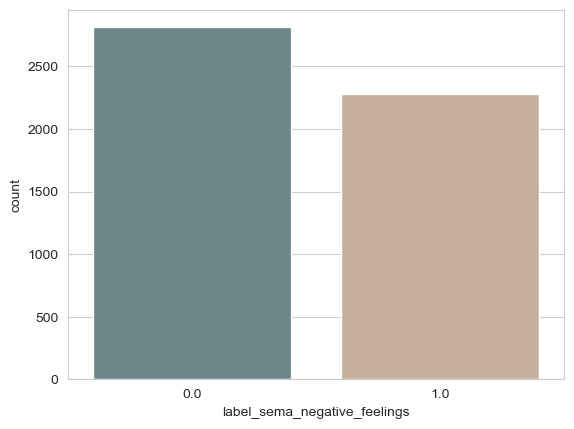

In [44]:
p = sns.countplot(x='label_sema_negative_feelings', data=df)
plt.savefig("visualizations/semas_barplots.png")
plt.savefig("visualizations/semas_barplots.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


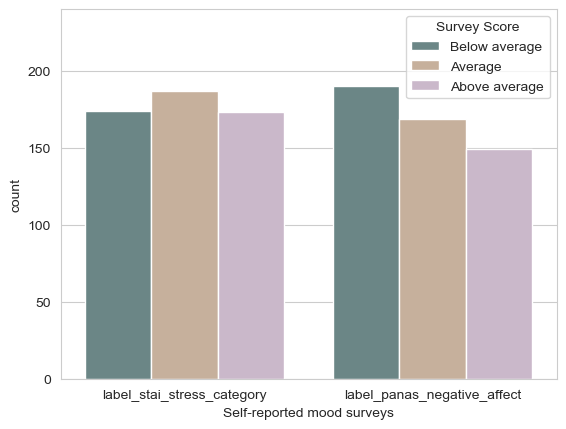

In [45]:
df1 = mood.melt(var_name='Self-reported mood surveys', value_name='Survey Score')
df1['Survey Score'] = pd.Categorical(df1['Survey Score'], categories=['Below average', 'Average', 'Above average'], ordered=True)
sns.countplot(x='Self-reported mood surveys', hue='Survey Score', data=df1)
plt.ylim(0, 240)
plt.savefig("visualizations/mood_barplots.png")
plt.savefig("visualizations/mood_barplots.eps")
plt.show()